# First CNN

<img src="./images/conv.png" alt="Convolutions" style="width: 700px;"/>

The main factor which makes deep learning so useful for computer vision is the use of convolutions. Convolutions integrates the data structure in the learning while decreasing the number of weights in the network.

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
from utils.validation import validation_report

Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

The following network is simple. It is a ConvNet, family of networks composed of a stacking of Conv-Pool blocks and a final block of dense layers such as:

Conv-Pool-Conv-Pool-FC-FC

The number of filters used in the convolutional layers is low for speed reasons.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, MaxPooling2D, Flatten
import keras.metrics as metrics

dropout_rate=0.1

model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation='softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, decay=0., nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [4]:
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 63s - loss: 14.4952 - categorical_accuracy: 0.1003 - top3_acc: 0.9944    
Epoch 2/5
60000/60000 [==============================] - 63s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000    
Epoch 3/5
60000/60000 [==============================] - 62s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000    
Epoch 4/5
60000/60000 [==============================] - 62s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000    
Epoch 5/5
60000/60000 [==============================] - 64s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000    


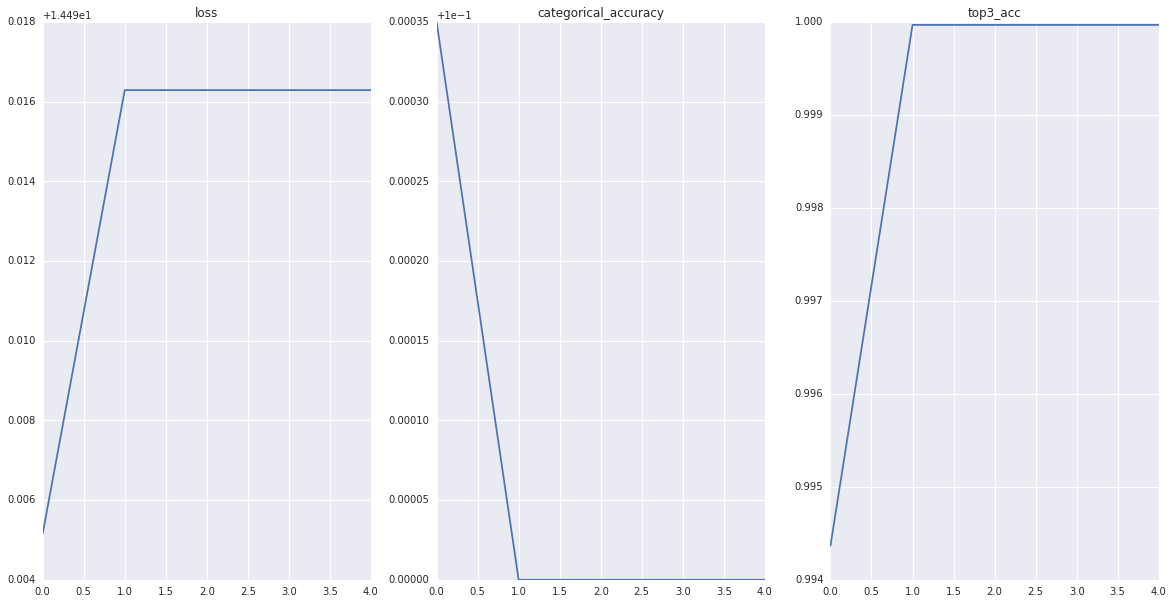

In [5]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [6]:
validation_report(test_data=X_test.reshape(-1, 28, 28, 1),
                 test_label=y_test,
                 model=model,
                 names=Labels)

Accuracy: 
0.1



Confusion matrix: 
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
 [   0    0    0    0    0    0    0    0    0    0]]



             precision    recall  f1-score   support

T-shirt/top       0.00      0.00      0.00         0
    Trouser       0.00      0.00      0.00         0
   Pullover       0.00      0.00      0.00         0
      Dress       0.00      0.00      0.00         0
       Coat       0.00      0.00      0.00         0
     Sandal       0.00      0.00      0.00         0
      Shirt       0.00      0.00      0.00         0
    

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Conclusion

* Are the results improved with the use of convolutions?
* Did you tune the hyper parameters for convolutions?
* Have you changed the number of filters in the convolutions?
* Can you compute the number of weights used in this CNN and compare it to the previous networks?


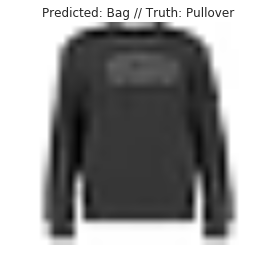

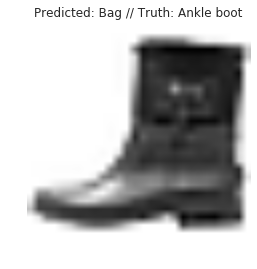

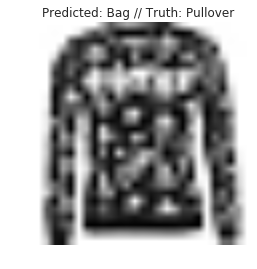

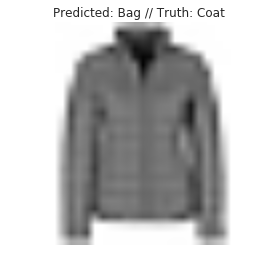

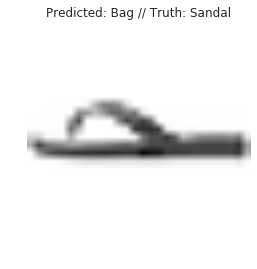

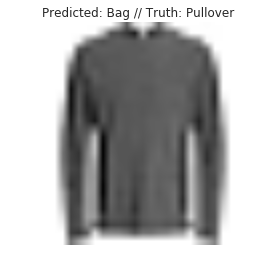

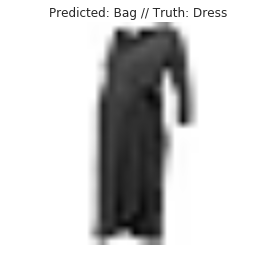

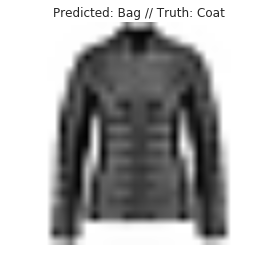

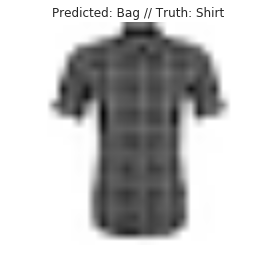

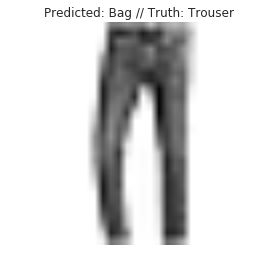

In [7]:
import random


predictions = model.predict(X_test.reshape(-1, 28, 28, 1)).argmax(axis=1)

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="Greys")
    plt.axis("off")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))